In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:

def population_distribution():
    "Return a PMF (array) with Index as Random Variable and Values as Probablity "
    #Define the Population Distribution
    "In this Example We are Combining 3 Normal Distribution to Form a Population Distribution  "
    samples = 100000# We will draw this many samples from Normal 
    mu = 10 # Mean 
    sigma = 3# Standard Devation 
    vals = np.zeros(samples) # List of genrated Random variable 
    vals[:samples//3] = np.random.normal(mu,sigma,samples//3)# First (1/3)rd items 
    vals[samples//3 : 2*(samples//3)] = np.random.normal(2.4*mu,sigma*1.3,samples//3)# Second (1/3)rd items
    vals[2*(samples//3): 3*(samples//3)] = np.random.normal(4*mu,sigma*0.8,samples//3)# Third (1/3)rd items
    
    #Making Sure that Distribution Starts From Zero
    val_min , val_max  = int(np.min(vals)) ,int(np.max(vals))
    arr_size = val_max - val_min
    distribution = np.zeros(arr_size+1)
    print(arr_size)
    for sample in vals:
        int_sample = int(sample)-val_min #Making the Values discrete and Starting From Zero 
        distribution[int_sample] += 1 #Counting the occurrence 
    distribution = distribution/samples
    plt.title("PMF of Population ")
    plt.xlabel("Random Variable Values")
    plt.ylabel("Probablity of The Random Varible")
    plt.plot(np.arange(arr_size+1) , distribution)#Ploting the Distribution 
    plt.show()
    
    return  distribution#Returing Probablity Mass Function 
def PMF2CDF(pmf):
    "Calculating CDF from PMF"
    sum_pro , cdf = 0 , np.zeros(pmf.shape[0])
 
    for i,p in enumerate(pmf):
        sum_pro+=p
        cdf[i]=sum_pro
    plt.title("CDF")
    plt.xlabel("Random Variable")
    plt.ylabel("Probablity ")
    plt.plot(np.arange(cdf.shape[0]),cdf)
    plt.show()
    return cdf

52


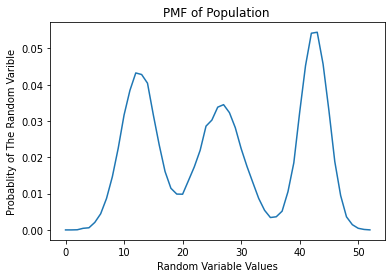

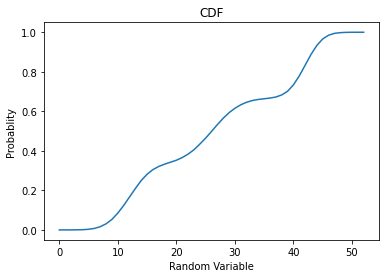

In [38]:
population_pmf = population_distribution()
population_cdf = PMF2CDF(population_pmf)

In [39]:
#Closest Distance
def Expectation(pmf):
    "Calculates the Expectation assuming Index as Random Variable and Values as Probablity"
    Exp = 0
    for i,val in enumerate(pmf):
        Exp+= i*val
    return Exp
def closest_distance(up,cdf):
    "Return the Inverse value(Random Variable) of CDF for Probablity up "
    idx = -1
    minDist = 10000000
    #print(up)
    temp = -1
    for i,dp in enumerate(cdf):
        #print(i,dp)
        if(np.abs(dp-up)< minDist):
            temp = dp
            minDist = np.abs(dp-up)
            idx=i
    #print("Uniform Prob : ",up,"CDF Prob : ",temp ,"Min Distance ",minDist,"Index",idx)
    return idx
def drawSample(cdf,sample_size = 30,show = False):
    "Takes Draws Sample based on the CDF of Population "
    U = np.random.uniform(0,1,sample_size)# Drawing Random Samples from Uniform
    sampleing = list()
    for i in U:
        sampleing.append(closest_distance(i,cdf))#Passing the U in inverse cdf
    #print(sampleing)
    distGen = np.zeros(cdf.shape[0])# Collecting the final Distribution
    for sap in  sampleing:
        distGen[sap]+=1
    
    mean = Expectation(distGen/sample_size)
    
    if(show):  
        print("Expecation : ", mean)
        plt.plot(np.arange(cdf.shape[0]),distGen)
        plt.show()
    
    return mean

In [40]:
print("Population Expectation : ", Expectation(pop_PMF))

Population Expectation :  27.166509999999995


In [65]:
n = 3000
mean_distribution = list()
for i in range(n):
    mean_distribution.append(drawSample(cdf,50))

In [66]:
mean_distribution = np.asarray(mean_distribution)


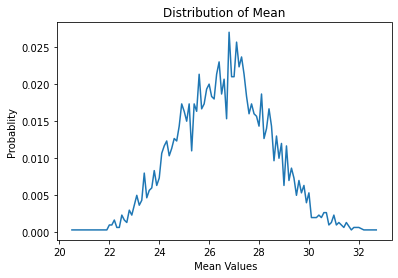

In [67]:
def buckting(arr ,precsion):
    arr = precsion*arr
    arr = np.asarray(arr,dtype=int)
    dist = dict()
    for val in arr:
        if(dist.get(val) is not None):
            dist[val] +=1
        else:
            dist[val] = 1
    return dist
precsion = 10
mean_distribution = np.sort(mean_distribution)
d = buckting(mean_distribution , precsion)
m_range = np.array(list(d.keys()))/precsion
plt.plot(m_range,np.asarray(list(d.values()))/mean_distribution.shape)
plt.xlabel(" Mean Values")
plt.ylabel("Probablity")
plt.title("Distribution of Mean")
plt.show()